In [1]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])

In [3]:
import scipy as sc
print('scipy: {}'.format(sc.__version__))

scipy: 0.18.1


In [2]:
from sklearn.naive_bayes import GaussianNB

In [3]:
#pido el clasificador
clf = GaussianNB()
#X son mis features, e Y son mis labels(las categorias, clases)
clf.fit(X,Y)

GaussianNB(priors=None)

In [10]:
#clasifico un nuevo punto
print(clf.predict([[-0.9, -1]]))

#clasifico otro punto
print(clf.predict([[9, 22]]))

#otro
print(clf.predict([[0, 0]]))

[1]
[2]
[1]


In [12]:
#funcion de exactitud
from sklearn.metrics import accuracy_score

x_true = [2,43,5,7]
y_pred = [3,43,5,7]
#le pegue a 3

accuracy_score(y_pred, x_true)

0.75

In [13]:

x_true = [2,3,2,7]
y_pred = [3,43,5,7]
#le pegue a 1

accuracy_score(y_pred, x_true, normalize = False)

1

In [23]:
#1 ejercicio, voy a predecir por mi cuenta
#los positivos incluido el cero son 1
#los negativos son ceros


feature_train = np.array([[3],[6],[-6],[-8],[0],[1],[5],[-56],[-1],[-8]])
#labels_train = labels(feature_train) hacerlo
labels_train = np.array([1,1,0,0,1,1,1,0,0,0])

clf = GaussianNB()

clf.fit(feature_train, labels_train)

pred = clf.predict([[1],[-7],[2],[67],[0],[-7]])

#al 67 me lo predice mal porque no tengo un numero de 2 dig para entrenar
#si pongo un numero de 2 dig en el train me lo clasifica bien

print(pred)

[1 0 1 0 1 0]


In [7]:
#SVM

from sklearn import svm

x = [[0,0], [1,1]]  #features
y = [0,1]

clf = svm.SVC()
clf.fit(x, y)

#se pone tantos labels como puntos haya
#si pongo 3 puntos y 2 labels, me tirar error, ej [2,2]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
print(clf.predict([[8,8]]))
print(clf.predict([[-2,-1]]))

[1]
[0]


In [11]:
#support vectors

#cuales son los support vectors
print(clf.support_vectors_)
print
#sus indices
print(clf.support_)
print
#dame el numero de support vectors pos clase
print(clf.n_support_)

[[ 0.  0.]
 [ 1.  1.]]

[0 1]

[1 1]


In [7]:
#primer modelo para iris
import pandas as pd

features = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv('iris.data', names = features)

In [8]:
data.shape

(150, 5)

In [9]:
data.head(5)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
data.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [11]:
data.dtypes

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
class            object
dtype: object

In [14]:
import matplotlib.pyplot as plt

data['sepal-width'].hist()
plt.show()

In [26]:
#hago cross validation
from sklearn import model_selection

array = data.values
x = array[:,0:4]
y = array[:,4]
validation_size = 4
seed = 7


x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x, y, test_size = validation_size, random_state = seed)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
kfold = model_selection.KFold(n_splits=10, random_state = 7)
cv_results = model_selection.cross_val_score(knn, x_train, y_train, cv = kfold, scoring = 'accuracy')

In [29]:
from sklearn.metrics import accuracy_score

knn.fit(x_train, y_train)
pred = knn.predict(x_validation)

acu = accuracy_score(pred, y_validation)

print(acu)

1.0


In [34]:
#Cross Validation
import sklearn

sklearn.__version__

'0.18.1'

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

iris = datasets.load_iris()
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [46]:
features = iris.data #cargo todos los datos    #cada uno tiene 150
labels = iris.target #cargo todos los labels

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.4, random_state = 0)


In [49]:
print(x_train.shape)  #es el 60% de los datos(features), su dimension es de 90 filas por 4 columnas, es como un mini iris
print(y_train.shape)   #son los labels correspondientes

#voy a entrenar con x_train, y voy a probar mi algoritmo con x_test

print(x_test.shape) # es el 40% restante de los datos, con estos voy a predecir
print(y_test.shape) # son sus labels correspondientes

(90, 4)
(90,)
(60, 4)
(60,)


In [58]:
y_train.view()

array([1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [59]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear', C = 1).fit(x_train, y_train)

clf.score(x_test, y_test)
#con el x_train y el y_train voy a encontrar los hiperparametros
#clf.best_params_.

0.96666666666666667

In [61]:
#Tutorial con iris

from sklearn import datasets

iris = datasets.load_iris()

In [62]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [63]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [64]:
iris.target #estos son los labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [65]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [67]:
print iris.data.shape
print iris.target.shape

(150, 4)
(150,)


In [68]:
x = iris.data
y = iris.target

In [79]:
#aplico knn sobre iris
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn5 = KNeighborsClassifier(n_neighbors = 5)

knn5.fit(x,y)
knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [81]:
from sklearn.metrics import accuracy_score

pred1 = knn.predict(x)
pred2 = knn5.predict(x)

print (accuracy_score(pred1, y))
print (accuracy_score(pred2, y))

1.0
0.966666666667


In [ ]:
#un nuevo dato
knn.predict([3,5,4,2])

In [76]:
new_point = [[0.3,2,1,1], [1,0.4,1,0.5]]
knn.predict(new_point)

array([0, 0])

In [78]:
#uso otro modelo, regresion logistica

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x,y)

print clf.predict([[3,5,4,2]])
print clf.predict(new_point)

#me dio diferente que knn

[2]
[2 1]


In [84]:
pred_reg = clf.predict(x)

print(accuracy_score(y, pred_reg))

0.96


In [90]:
#Divido el set en train y test
from sklearn.model_selection import train_test_split

features = iris.data
labels = iris.target

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.4, random_state = 4)

#NOTA: con random_state = 0 obtuve peores resultados, con 4 mejor
#entreno con x_train, e y_train, despues hago prediccion con x_test
#y pruebo mi efectividad con y_test

In [91]:
#aplico regression lineal

rl = LogisticRegression()
rl.fit(x_train, y_train)

pred = rl.predict(x_test)
print pred
print y_test

#pruebo efectividad

print 
print (accuracy_score(pred, y_test))

#baje de 0.96 a 0.91

[2 0 2 2 2 1 2 0 0 1 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 2 0 2 0 1 2 2
 1 1 0 2 0 1 0 2 0 0 1 1 2 0 1 2 2 1 1 0 1 2 1]
[2 0 2 2 2 1 1 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1 1 0 2 0 1 0 2 0 0 1 1 2 0 1 2 2 1 1 0 1 2 1]

0.95


In [92]:
#pruebo con knn5

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print(accuracy_score(pred, y_test))

#de 0.96 baje a 0.95

0.966666666667


In [93]:
#calculo el mejor valore de k para knn

k_range = range(1,26)  #cantidad de k a probar
score = []             #accuracy_score para cada k

for k in k_range:
    
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    score.append(accuracy_score(pred, y_test))
    
score

[0.94999999999999996,
 0.94999999999999996,
 0.96666666666666667,
 0.96666666666666667,
 0.96666666666666667,
 0.98333333333333328,
 0.98333333333333328,
 0.98333333333333328,
 0.98333333333333328,
 0.98333333333333328,
 0.98333333333333328,
 0.98333333333333328,
 0.98333333333333328,
 0.98333333333333328,
 0.98333333333333328,
 0.98333333333333328,
 0.98333333333333328,
 0.96666666666666667,
 0.98333333333333328,
 0.96666666666666667,
 0.96666666666666667,
 0.96666666666666667,
 0.96666666666666667,
 0.94999999999999996,
 0.94999999999999996]

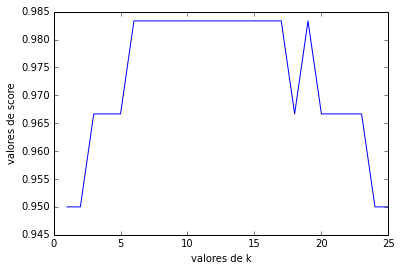

In [99]:
#voy a plotear mis resultados 
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, score);
plt.xlabel('valores de k');
plt.ylabel('valores de score');

#para k entre 5 y 17 y para k 19, el score es maximo

In [ ]:
#hacer lo mismo con random_state